<a href="https://colab.research.google.com/github/waveology/nlam/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install cartopy

In [3]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [8]:
 !wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/z1TfCv9Tk13uDCF/download -O data_pen.txt

In [9]:
# Fichero con coordenadas lat/lon del grid de HARMONIE (AIC)
# -----------------------------------------------------------
f = open('/content/data_pen.txt','r')
f.readline()
z = np.array(f.read().strip().split())
z = z.reshape(len(z)//3,3).astype(float)
f.close()

# Dimensiones de la rejilla
# --------------------------
Nx = 1141
Ny = 853

lat = z[:,0].reshape(Ny,Nx)
lon = z[:,1].reshape(Ny,Nx)

In [10]:
# Proyección Lambert de HARMONIE/AIB
# ------------------------------------
lambert_proj = ccrs.LambertConformal(
        central_latitude = 40.022,
        central_longitude = -4.971,
        standard_parallels=(40,40)
        )

# Transformación
# --------------
z = lambert_proj.transform_points(ccrs.PlateCarree(),lon,lat)


In [11]:
# Coordenadas transformadas
# -------------------------
llon =   z[:,:,0]
llat =   z[:,:,1]

# Guardamos el resultado
# -------------------------------
nwp_xy_harmonie = np.stack((llon,llat))
np.save('nwp_xy_harmonie.npy',nwp_xy_harmonie)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


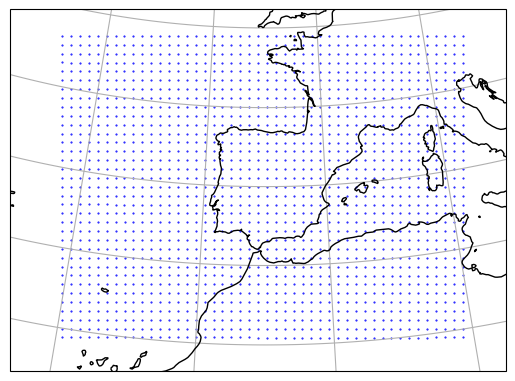

In [12]:
# Dibujico
# ----------
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=lambert_proj)
ax.set_extent([-23, 12, 28, 50], crs=ccrs.PlateCarree())


skip=25
ax.plot(llon[::skip,::skip],llat[::skip,::skip],
        marker='o',
        ms=0.5,
        lw=0,
        color='blue',
        transform=lambert_proj
        )

ax.coastlines(resolution='50m',zorder=20)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
